In [1]:
import pandas as pd
import sqlite3 as sql

In [2]:
database = "chinook.db"
conn = sql.connect(database)

In [3]:
def read_query(q):
    return pd.read_sql_query(q, conn)

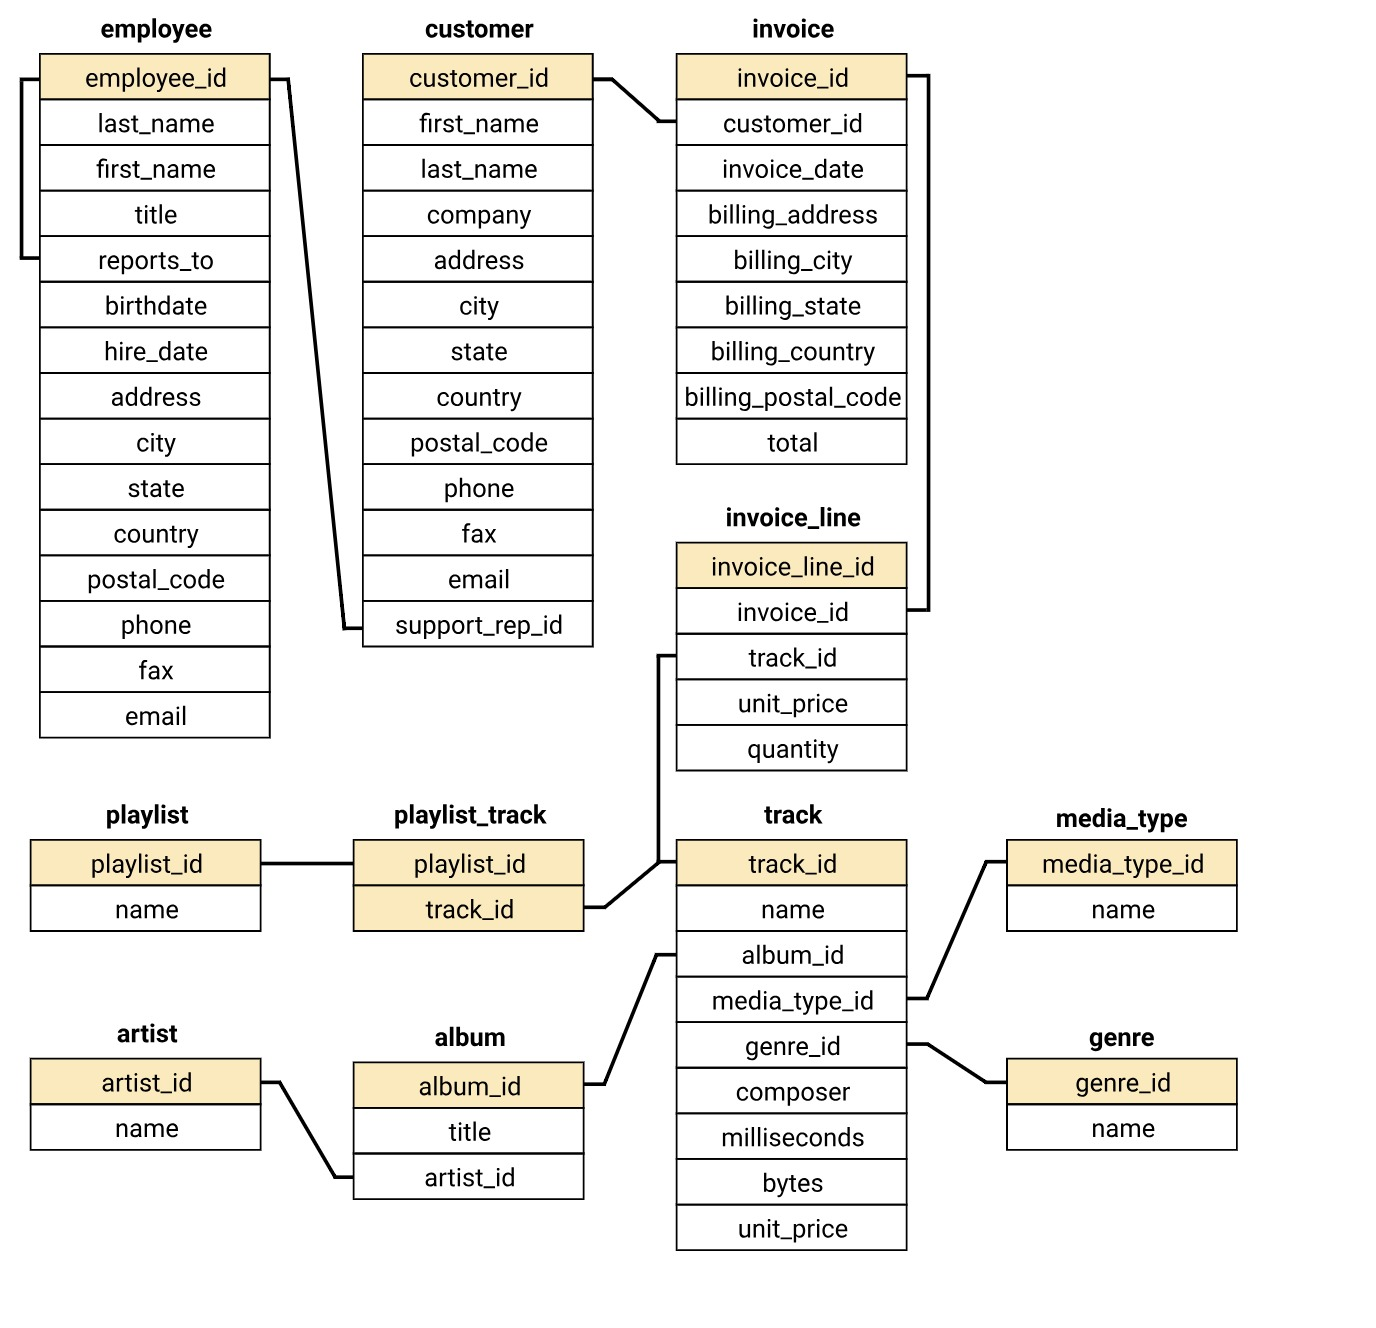

In [4]:
q = """select * from sqlite_master where type == "table"  """

read_query(q)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [5]:
q = """select * from invoice where invoice_id == 1 """

read_query(q)

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total,tax,subtotal
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84,0,15.84


In [6]:
q = """select * from invoice_line where invoice_id == 1 """

read_query(q)

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1
5,6,1,1163,0.99,1
6,7,1,1164,0.99,1
7,8,1,1165,0.99,1
8,9,1,1166,0.99,1
9,10,1,1167,0.99,1


In [7]:
q = """select sum(unit_price) from invoice_line where invoice_id == 1 """

read_query(q)

,sum(unit_price)
0,15.84


In [8]:
# invoice_id, track_id, track_name,track_type, quantity, unit_price where invoice_id = 1

In [9]:
q = """select il.invoice_id Invoice_id, t.track_id Track_id, t.name Track_name, m.name Track_type,
        il.unit_price, il.quantity
        from invoice_line il
        inner join track t
        on 
        il.track_id = t.track_id
        inner join media_type m
        on
        m.media_type_id = t.media_type_id"""

read_query(q)

,Invoice_id,Track_id,Track_name,Track_type,unit_price,quantity
0,1,1158,Right Next Door to Hell,Protected AAC audio file,0.99,1
1,1,1159,Dust N' Bones,Protected AAC audio file,0.99,1
2,1,1160,Live and Let Die,Protected AAC audio file,0.99,1
3,1,1161,Don't Cry (Original),Protected AAC audio file,0.99,1
4,1,1162,Perfect Crime,Protected AAC audio file,0.99,1
...,...,...,...,...,...,...
4752,614,2659,Every Breath You Take,MPEG audio file,0.99,1
4753,614,2660,King Of Pain,MPEG audio file,0.99,1
4754,614,2661,Wrapped Around Your Finger,MPEG audio file,0.99,1
4755,614,2662,Don't Stand So Close to Me '86,MPEG audio file,0.99,1


In [10]:
q = """select il.invoice_id Invoice_id, t.track_id Track_id, t.name Track_name, m.name Track_type,
        il.unit_price, il.quantity,
        ar.name Artist_Name
        from invoice_line il
        inner join track t
        on 
        il.track_id = t.track_id
        inner join media_type m
        on
        m.media_type_id = t.media_type_id
        inner join album alb
        on
        t.album_id = alb.album_id
        inner join artist ar
        on
        alb.artist_id = ar.artist_id
        where il.invoice_id = 1"""

read_query(q)

,Invoice_id,Track_id,Track_name,Track_type,unit_price,quantity,Artist_Name
0,1,1158,Right Next Door to Hell,Protected AAC audio file,0.99,1,Guns N' Roses
1,1,1159,Dust N' Bones,Protected AAC audio file,0.99,1,Guns N' Roses
2,1,1160,Live and Let Die,Protected AAC audio file,0.99,1,Guns N' Roses
3,1,1161,Don't Cry (Original),Protected AAC audio file,0.99,1,Guns N' Roses
4,1,1162,Perfect Crime,Protected AAC audio file,0.99,1,Guns N' Roses
5,1,1163,You Ain't the First,Protected AAC audio file,0.99,1,Guns N' Roses
6,1,1164,Bad Obsession,Protected AAC audio file,0.99,1,Guns N' Roses
7,1,1165,Back off Bitch,Protected AAC audio file,0.99,1,Guns N' Roses
8,1,1166,Double Talkin' Jive,Protected AAC audio file,0.99,1,Guns N' Roses
9,1,1167,November Rain,Protected AAC audio file,0.99,1,Guns N' Roses


In [11]:
# Album_Title, Artist_Name, No_of_Track_Sold

In [27]:
q = """select alb.title Album_Title,  sum(quantity) No_of_Track_Sold
        from album alb
        inner join artist ar
        on
        alb.artist_id = ar.artist_id
        inner join track t
        on
        t.album_id = alb.album_id
        inner join invoice_line il
        on
        il.track_id = t.track_id
        group by alb.album_id
        """

read_query(q)

,Album_Title,No_of_Track_Sold
0,For Those About To Rock We Salute You,74
1,Balls to the Wall,3
2,Restless and Wild,6
3,Let There Be Rock,50
4,Big Ones,80
...,...,...
246,Bartok: Violin & Viola Concertos,1
247,South American Getaway,1
248,Prokofiev: Symphony No.5 & Stravinksy: Le Sacr...,1
249,Great Recordings of the Century: Paganini's 24...,8


In [13]:
q = """select e1.first_name || " " || e1.last_name Employee_Name,
        e1.title Employee_Title,
        e2.first_name || " " || e2.last_name Supervisor_Name
        from employee e1
        left join employee e2
        on
        e1.reports_to = e2.employee_id
        """

read_query(q)

,Employee_Name,Employee_Title,Supervisor_Name
0,Andrew Adams,General Manager,None
1,Nancy Edwards,Sales Manager,Andrew Adams
2,Jane Peacock,Sales Support Agent,Nancy Edwards
3,Margaret Park,Sales Support Agent,Nancy Edwards
4,Steve Johnson,Sales Support Agent,Nancy Edwards
5,Michael Mitchell,IT Manager,Andrew Adams
6,Robert King,IT Staff,Michael Mitchell
7,Laura Callahan,IT Staff,Michael Mitchell


In [14]:
#Customer_Name, No_visit, total_spend

In [22]:
q = """select c.first_name || " " || c.last_name Customer_Name,
        count(inv.invoice_id) No_of_Visit,
        sum(inv.total) Total_Spend
        from customer c
        left join invoice inv
        on 
        c.customer_id = inv.customer_id
        group by c.customer_id
        order by 3 DESC
        limit 5
        """

read_query(q)

,Customer_Name,No_of_Visit,Total_Spend
0,František Wichterlová,18,144.54
1,Helena Holý,12,128.70
2,Hugh O'Reilly,13,114.84
3,Manoj Pareek,13,111.87
4,Luís Gonçalves,13,108.90


In [16]:
q = """select c.first_name || " " || c.last_name Customer_Name,
        count(inv.invoice_id) No_of_Visit,
        sum(inv.total) Total_Spend,
        case
            when sum(inv.total) < 40 then "Small Spender"
            when sum(inv.total) > 100 then "Big Spender"
            else "Regular"
        end customer_category
        from customer c
        left join invoice inv
        on 
        c.customer_id = inv.customer_id
        group by c.customer_id
        """

read_query(q)

,Customer_Name,No_of_Visit,Total_Spend,customer_category
0,Luís Gonçalves,13,108.90,Big Spender
1,Leonie Köhler,11,82.17,Regular
2,François Tremblay,9,99.99,Regular
3,Bjørn Hansen,9,72.27,Regular
4,František Wichterlová,18,144.54,Big Spender
5,Helena Holý,12,128.70,Big Spender
6,Astrid Gruber,9,69.30,Regular
7,Daan Peeters,7,60.39,Regular
8,Kara Nielsen,10,37.62,Small Spender
9,Eduardo Martins,12,60.39,Regular


In [17]:
q = """select c.first_name || " " || c.last_name Customer_Name,
        count(inv.invoice_id) No_of_Visit,
        sum(inv.total) Total_Spend,
        case
            when sum(inv.total) < 40 then "Small Spender"
            when sum(inv.total) > 100 then "Big Spender"
            else "Regular"
        end customer_category
        from customer c
        left join invoice inv
        on 
        c.customer_id = inv.customer_id
        group by c.customer_id
        order by 3 DESC
        """

read_query(q)

,Customer_Name,No_of_Visit,Total_Spend,customer_category
0,František Wichterlová,18,144.54,Big Spender
1,Helena Holý,12,128.70,Big Spender
2,Hugh O'Reilly,13,114.84,Big Spender
3,Manoj Pareek,13,111.87,Big Spender
4,Luís Gonçalves,13,108.90,Big Spender
5,Fernanda Ramos,15,106.92,Big Spender
6,João Fernandes,13,102.96,Big Spender
7,François Tremblay,9,99.99,Regular
8,Wyatt Girard,11,99.99,Regular
9,Jack Smith,12,98.01,Regular


In [18]:
q = """with playlist_info as 
        (select ply.playlist_id, ply.name Playlist_Name, t.track_id Track_ID,
        t.milliseconds/1000 duration
        from playlist ply
        left join playlist_track ply_track
        on
        ply_track.playlist_id = ply.playlist_id
        inner join track t
        on
        ply_track.track_id = t.track_id)
        
        select playlist_id, Playlist_Name, 
        count(Track_ID) no_of_tracks, 
        sum(duration) total_duration_seconds 
        from playlist_info
        
        group by 1
        order by 1
        """

read_query(q)

,playlist_id,Playlist_Name,no_of_tracks,total_duration_seconds
0,1,Music,3290,876049
1,3,TV Shows,213,500987
2,5,90’s Music,1477,397970
3,8,Music,3290,876049
4,9,Music Videos,1,294
5,10,TV Shows,213,500987
6,11,Brazilian Music,39,9464
7,12,Classical,75,21736
8,13,Classical 101 - Deep Cuts,25,6742
9,14,Classical 101 - Next Steps,25,7565


* New York
* total spend > 90